In [ ]:
import numpy as np
import pandas as pd

In [ ]:
housing = pd.read_csv("/content/Housing.csv")

In [ ]:
housing.head

<bound method NDFrame.head of         price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0    13300000  7420         4          2        3      yes        no       no   
1    12250000  8960         4          4        4      yes        no       no   
2    12250000  9960         3          2        2      yes        no      yes   
3    12215000  7500         4          2        2      yes        no      yes   
4    11410000  7420         4          1        2      yes       yes      yes   
..        ...   ...       ...        ...      ...      ...       ...      ...   
540   1820000  3000         2          1        1      yes        no      yes   
541   1767150  2400         3          1        1       no        no       no   
542   1750000  3620         2          1        1      yes        no       no   
543   1750000  2910         3          1        1       no        no       no   
544   1750000  3850         3          1        2      yes        no       no  

In [ ]:
housing.info

<bound method DataFrame.info of         price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0    13300000  7420         4          2        3      yes        no       no   
1    12250000  8960         4          4        4      yes        no       no   
2    12250000  9960         3          2        2      yes        no      yes   
3    12215000  7500         4          2        2      yes        no      yes   
4    11410000  7420         4          1        2      yes       yes      yes   
..        ...   ...       ...        ...      ...      ...       ...      ...   
540   1820000  3000         2          1        1      yes        no      yes   
541   1767150  2400         3          1        1       no        no       no   
542   1750000  3620         2          1        1      yes        no       no   
543   1750000  2910         3          1        1       no        no       no   
544   1750000  3850         3          1        2      yes        no       no

In [ ]:
housing.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

In [ ]:
housing.shape

(545, 13)

In [ ]:
housing.dtypes

price                int64
area                 int64
bedrooms             int64
bathrooms            int64
stories              int64
mainroad            object
guestroom           object
basement            object
hotwaterheating     object
airconditioning     object
parking              int64
prefarea            object
furnishingstatus    object
dtype: object

In [ ]:
type(housing['price'])

pandas.core.series.Series

In [ ]:
housing[['price']]

,price
0,13300000
1,12250000
2,12250000
3,12215000
4,11410000
...,...
540,1820000
541,1767150
542,1750000
543,1750000


In [ ]:
housing.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [ ]:
housing.describe

<bound method NDFrame.describe of         price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0    13300000  7420         4          2        3      yes        no       no   
1    12250000  8960         4          4        4      yes        no       no   
2    12250000  9960         3          2        2      yes        no      yes   
3    12215000  7500         4          2        2      yes        no      yes   
4    11410000  7420         4          1        2      yes       yes      yes   
..        ...   ...       ...        ...      ...      ...       ...      ...   
540   1820000  3000         2          1        1      yes        no      yes   
541   1767150  2400         3          1        1       no        no       no   
542   1750000  3620         2          1        1      yes        no       no   
543   1750000  2910         3          1        1       no        no       no   
544   1750000  3850         3          1        2      yes        no       

In [ ]:
import seaborn as sns

<ipython-input-124-3c160dfc24ee>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(housing.price)


<Axes: xlabel='price', ylabel='Density'>

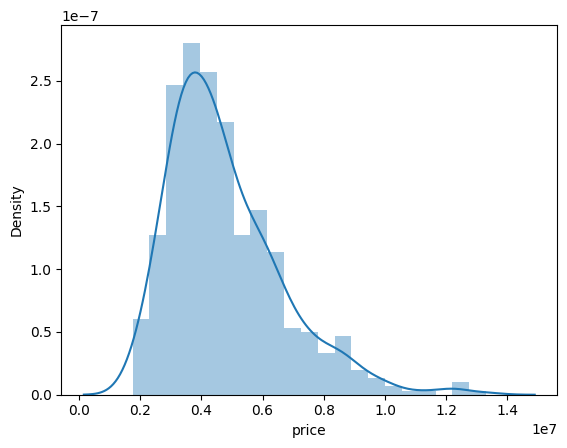

In [ ]:
sns.distplot(housing.price)

<Axes: >

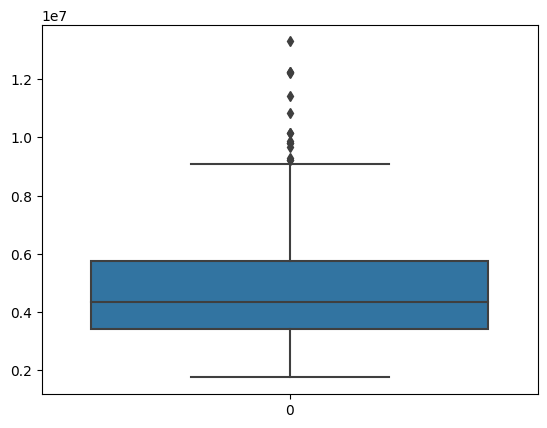

In [ ]:
sns.boxplot(housing.price)

In [ ]:
correlation = housing.corr()

<ipython-input-53-5171fc8766ee>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = housing.corr()


In [ ]:
correlation.loc['price']

price        1.000000
area         0.535997
bedrooms     0.366494
bathrooms    0.517545
stories      0.420712
parking      0.384394
Name: price, dtype: float64

In [ ]:
import matplotlib.pyplot as plt

<Axes: >

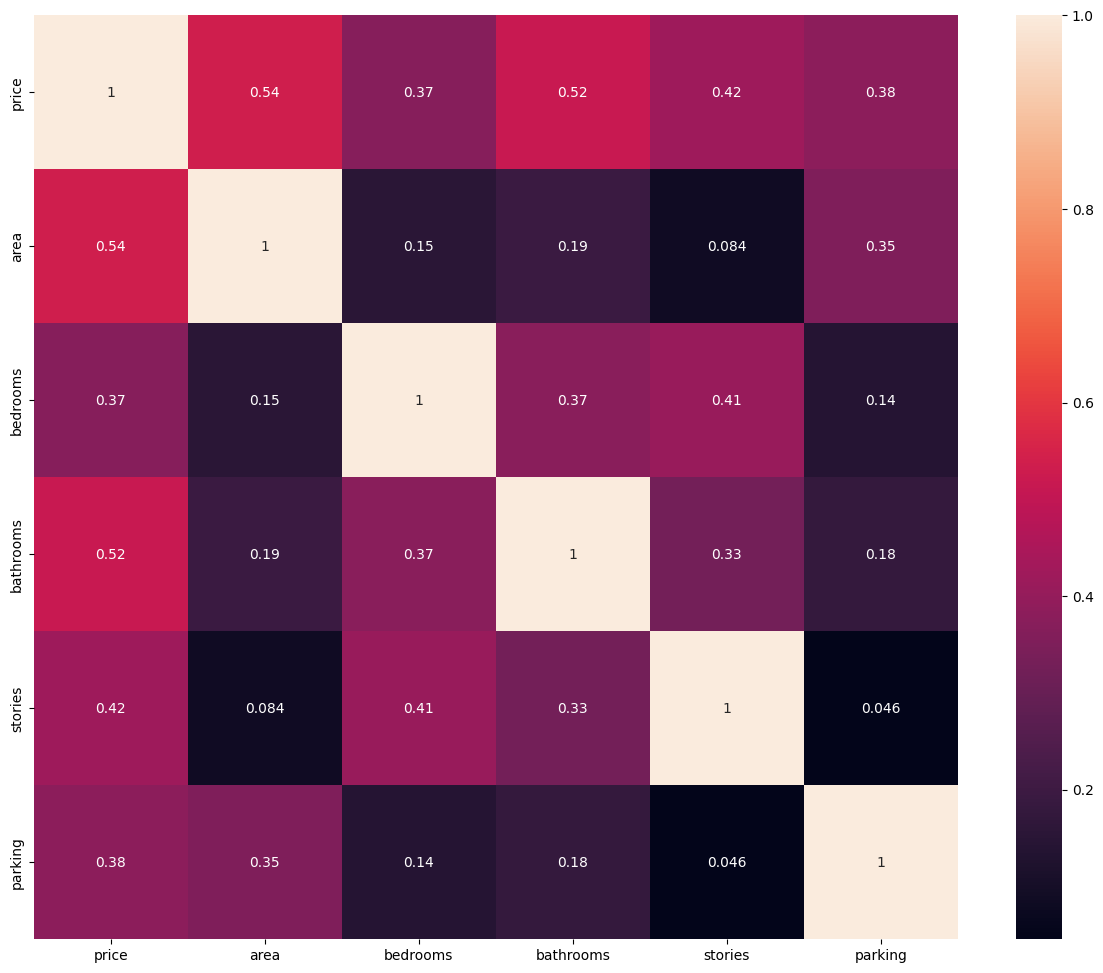

In [ ]:
fig,axes = plt.subplots(figsize=(15,12))
sns.heatmap(correlation,square=True,annot=True)

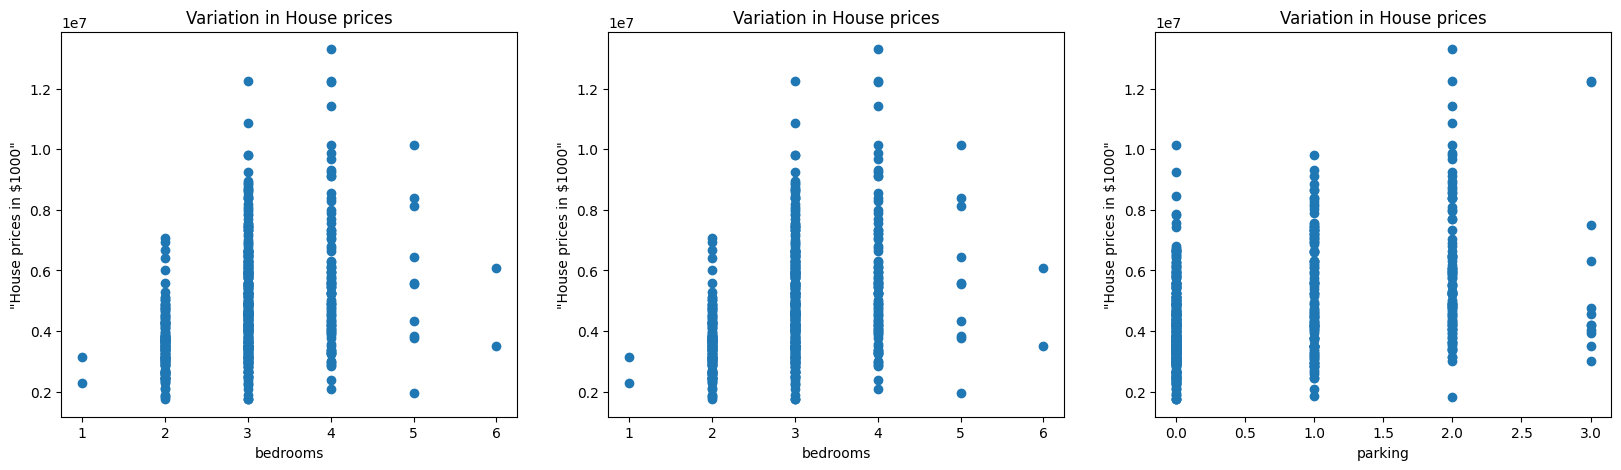

In [ ]:
plt.figure(figsize=(20,5))
features = ['bedrooms','bedrooms','parking']
for i, col in enumerate(features):
  plt.subplot(1, len(features), i+1)
  X = housing[col]
  y = housing.price
  a = 53.3
  plt.scatter(X, y, marker='o')
  plt.title("Variation in House prices")
  plt.xlabel(col)
  plt.ylabel('"House prices in $1000"')

In [ ]:
X = housing.iloc[:,:-1]
y= housing.price

In [ ]:
#from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)
mean = X_train.mean(axis=0)
std = X_train.std(axis=0)
print(X_train,X_test)
print(X_train-mean,X_test-mean)

In [ ]:
X_train = (X_train-mean) / std
X_test = (X_test-mean) / std

In [ ]:
from sklearn.metrics import mean_absolute_error
regressor = LinearRegression()
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
import keras
from keras.layers import Dense, Activation,Dropout
from keras.models import Sequential

In [ ]:
model = Sequential()
model.add(Dense(128,activation = 'relu',input_dim =13))
model.add(Dense(64,activation = 'relu'))
model.add(Dense(32,activation = 'relu'))
model.add(Dense(16,activation = 'relu'))
model.add(Dense(1))

In [ ]:
model.compile(optimizer = 'adam',loss ='mean_squared_error',metrics=['mae'])
model.summary()
from ann_visualizer.visualize import ann_viz;


In [ ]:
from ann_visualizer.visualize import ann_viz;
ann_viz(model, title="DEMO ANN");
history = model.fit( y_train, epochs=100, validation_split=0.05)

In [ ]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go
fig = go.Figure()
fig.add_trace(go.Scattergl(y=history.history['loss'],name='Train'))
fig.add_trace(go.Scattergl(y=history.history['val_loss'],name='Valid'))
fig.update_layout(height=500, width=700,
xaxis_title='Epoch',
yaxis_title='Loss')
fig.show()

fig.add_trace(go.Scattergl(y=history.history['mae'],
name='Train'))
fig.add_trace(go.Scattergl(y=history.history['val_mae'],
name='Valid'))
fig.update_layout(height=500, width=700,
xaxis_title='Epoch',
yaxis_title='Mean Absolute Error')
fig.show()


In [ ]:
from sklearn.metrics import mean_absolute_error
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

y_pred_lr = lr_model.predict(X_test)
mse_lr = mean_squared_error(y_test, y_pred_lr)
mae_lr = mean_absolute_error(y_test, y_pred_lr)
print('Mean squared error on test data: ', mse_lr)
print('Mean absolute error on test data: ', mae_lr)

Mean squared error on test data:  1.6142565679228622e-18
Mean absolute error on test data:  9.675406747394139e-10


In [ ]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print(r2)

from sklearn.metrics import mean_squared_error
rmse = (np.sqrt(mean_squared_error(y_test, y_pred)))
print(rmse)


1.0
2.0175670554266096e-09


In [ ]:
import sklearn
new_data = sklearn.preprocessing.StandardScaler().fit_transform(([[0.1, 10.0,
5.0, 0, 0.4, 6.0, 50, 6.0, 1, 400, 2000, 300, 10]]))+50

prediction = model.predict(new_data)
print("Predicted house price:", prediction)


1/1 [==============================] - 0s 105ms/step
Predicted house price: [[11.282506]]
